In [11]:
import numpy as np
from scipy.stats   import binom_test, beta
import matplotlib.pyplot as plt



In [10]:
# Parameters
n_flips = 100  # Number of coin flips
p_fair = 0.5   # Probability of heads for a fair coin
alpha = 0.05   # Significance level for Type I error

# Simulate a fair coin (Type I Error demonstration)
fair_coin_heads = sum(np.random.binomial(1, p_fair, n_flips))

# Perform binomial test
p_value_fair = binom_test(fair_coin_heads, n_flips, p_fair)

# Check for Type I Error
type_1_error = p_value_fair < alpha

# Simulate an unfair coin (Type II Error demonstration)
p_unfair = 0.55  # Slightly unfair coin
unfair_coin_heads = sum(np.random.binomial(1, p_unfair, n_flips))

# Perform binomial test
p_value_unfair = binom_test(unfair_coin_heads, n_flips, p_fair)

# Check for Type II Error
type_2_error = p_value_unfair >= alpha

# Results
print("Fair Coin - Type I Error:")
print(f"Number of heads: {fair_coin_heads}, p-value: {p_value_fair}, Type I Error: {type_1_error}")

print("\nUnfair Coin - Type II Error:")
print(f"Number of heads: {unfair_coin_heads}, p-value: {p_value_unfair}, Type II Error: {type_2_error}")


Fair Coin - Type I Error:
Number of heads: 38, p-value: 0.02097873567785172, Type I Error: True

Unfair Coin - Type II Error:
Number of heads: 59, p-value: 0.08862608011406765, Type II Error: True


/var/folders/hc/r468t5c13sl_7pb7py3qgcg00000gn/T/ipykernel_89578/1437912952.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_fair = binom_test(fair_coin_heads, n_flips, p_fair)
/var/folders/hc/r468t5c13sl_7pb7py3qgcg00000gn/T/ipykernel_89578/1437912952.py:20: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_unfair = binom_test(unfair_coin_heads, n_flips, p_fair)


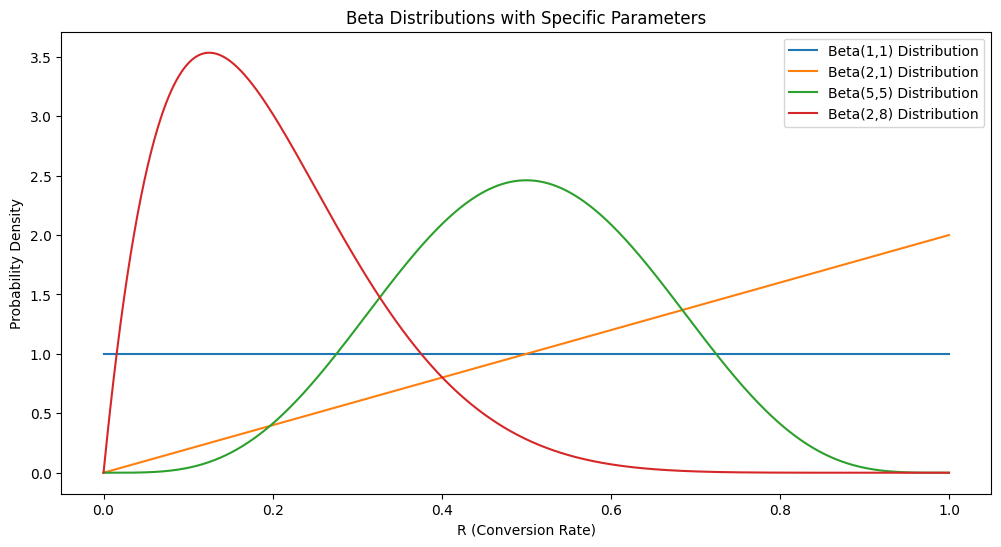

In [12]:
# Define the specific parameters for the Beta distributions
specific_parameters = [(1, 1), (2, 1), (5, 5), (2, 8)]

# Generate a range of values for R between 0 and 1
R_values = np.linspace(0, 1, 1000)

# Initialize the plot
plt.figure(figsize=(12, 6))

# Plot each Beta distribution using the specified parameters
for a, b in specific_parameters:
    # Calculate the probability density function for each Beta distribution
    beta_pdf = beta.pdf(R_values, a, b)
    # Plot the distribution
    plt.plot(R_values, beta_pdf, label=f'Beta({a},{b}) Distribution')

# Add titles and labels
plt.title('Beta Distributions with Specific Parameters')
plt.xlabel('R (Conversion Rate)')
plt.ylabel('Probability Density')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

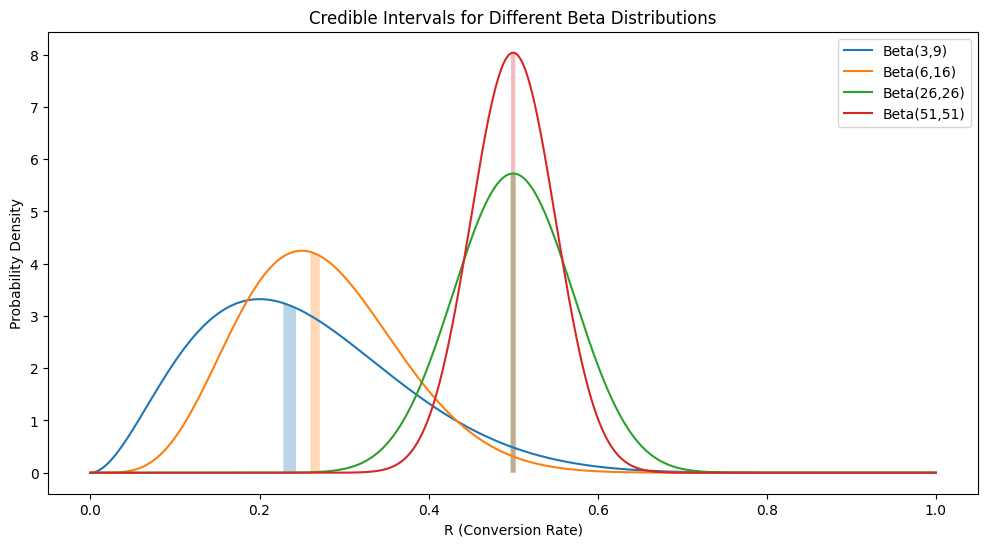

In [13]:
# Function to calculate the credible interval
def credible_interval(n, k, q):
    """
    Calculate the credible interval for Beta distribution with given parameters.

    Parameters:
    n (int): Total number of trials.
    k (int): Number of successes.
    q (float): Confidence level.

    Returns:
    tuple: Lower and upper bounds of the credible interval.
    """
    # Calculate the distribution
    distribution = beta(k + 1, n - k + 1)

    # Calculate the percentiles
    lower_bound = distribution.ppf(q / 2)
    upper_bound = distribution.ppf(1 - q / 2)

    return lower_bound, upper_bound

# Example values for n, k, and q
examples = [
    (10, 2, 0.95),  # Example 1
    (20, 5, 0.95),  # Example 2
    (50, 25, 0.95), # Example 3
    (100, 50, 0.95) # Example 4
]

# Plotting
plt.figure(figsize=(12, 6))

for n, k, q in examples:
    # Generate values for R
    R_values = np.linspace(0, 1, 1000)

    # Calculate the probability density function (PDF)
    beta_pdf = beta.pdf(R_values, k + 1, n - k + 1)

    # Plot the distribution
    plt.plot(R_values, beta_pdf, label=f'Beta({k + 1},{n - k + 1})')

    # Calculate credible interval
    lower_bound, upper_bound = credible_interval(n, k, q)

    # Highlight the credible interval
    plt.fill_between(R_values, beta_pdf, where=(R_values >= lower_bound) & (R_values <= upper_bound), alpha=0.3)

# Labels and legend
plt.title('Credible Intervals for Different Beta Distributions')
plt.xlabel('R (Conversion Rate)')
plt.ylabel('Probability Density')
plt.legend()

# Show plot
plt.show()

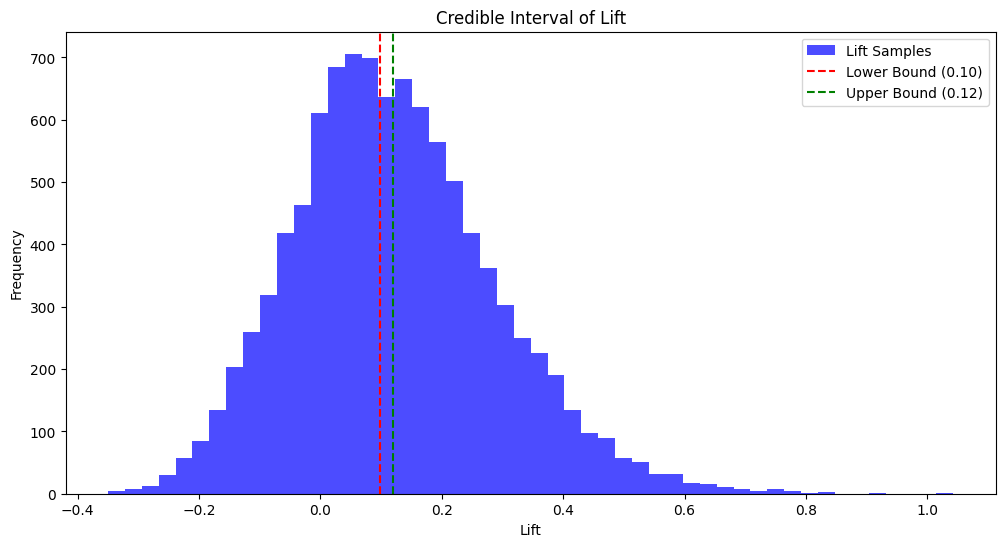

In [14]:
def calculate_lift_credible_interval(k_t, n_t, k_c, n_c, q):
    """
    Calculate the credible interval of lift for two Beta distributions.

    Parameters:
    k_t, n_t (int): Number of successes and total trials for test group.
    k_c, n_c (int): Number of successes and total trials for control group.
    q (float): Confidence level.

    Returns:
    tuple: Lower and upper bounds of the lift's credible interval.
    """
    # Draw samples from Beta distributions for test and control groups
    R_t_samples = beta.rvs(k_t + 1, n_t - k_t + 1, size=10000)
    R_c_samples = beta.rvs(k_c + 1, n_c - k_c + 1, size=10000)

    # Calculate lift for each pair of samples
    L_samples = R_t_samples / R_c_samples - 1

    # Calculate the percentiles for the credible interval
    lower_bound = np.percentile(L_samples, q / 2 * 100)
    upper_bound = np.percentile(L_samples, (1 - q / 2) * 100)

    return lower_bound, upper_bound, L_samples

# Example values for k_t, n_t, k_c, n_c, and q
k_t, n_t = 50, 100  # Test group
k_c, n_c = 45, 100  # Control group
q = 0.95  # Confidence level

# Calculate the credible interval of lift
lower_bound, upper_bound, L_samples = calculate_lift_credible_interval(k_t, n_t, k_c, n_c, q)

# Plotting
plt.figure(figsize=(12, 6))

# Histogram of lift samples
plt.hist(L_samples, bins=50, color='blue', alpha=0.7, label='Lift Samples')

# Indicate the credible interval
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')

# Labels and legend
plt.title('Credible Interval of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()